#### Deep Learning Jump Start with Azure Databricks

##### Problem Statement:
###### Build and Train a Deep Convolution Network to Classify Images in the CIFAR10 dataset using Keras on Azure Databricks
<br>
##### The CIFAR-10 dataset:
The CIFAR-10 dataset consists of **60000 32x32** colour images in **10 classes**, with **6000** images per class. There are **50000** training images and **10000** test images. 
<br>
###### Image Classes Example
<img src="https://github.com/AbidGuroo/DeepLearningJumpstart/blob/master/media/CIFAR10.png?raw=true" alt="CIFAR10" width="400"/>

<br>

<img src="https://s3.amazonaws.com/keras.io/img/keras-logo-2018-large-1200.png" alt="Keras" width="200"/>
##### **Keras** is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. 
* In this Technical Lab we will use Tensorflow as the backend for Keras

Keras is one of the leading frameworks to build deep learning models, It

1. Allows for easy and fast prototyping (through user friendliness, modularity, and extensibility).
2. Supports both convolutional networks and recurrent networks, as well as combinations of the two.
3. Runs seamlessly on CPU and GPU.

##### Step 1 - Library Import & general setup
* Keras
* Keras Preprocessing
* Keras Models
* Keras Layers
* Matplotlib

In [3]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt

###### Validate GPU accessibility

In [5]:
# Test to Validate Tensorflow can access GPU
from tensorflow.python.client import device_lib
assert 'GPU' in str(device_lib.list_local_devices())

# Test to Validate Keras can access GPU
from keras import backend
assert len(backend.tensorflow_backend._get_available_gpus()) > 0

###### Define Helper functions for plots and image display

In [7]:
def plotmetrics(history):
  width = 10
  height = 5
  ## Clear plot if repeated call
  plt.clf()
  plt.figure(figsize=(width, height))
  # Plot training & validation accuracy values
  plt.title('Model Metrics : Non Augmented Data')
  plt.subplot(1, 2, 1)
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  # Plot training & validation loss values
  plt.subplot(1, 2, 2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Test'], loc='upper left')
  pltoutput = plt.show()
  return pltoutput

In [8]:
def plotImages( images_arr, n_images=8):
    fig, axes = plt.subplots(n_images, n_images, figsize=(10,10))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
    
        ax.imshow( img, cmap="Greys_r")
        ax.set_xticks(())
        ax.set_yticks(())
    plot = plt.tight_layout()
    return plot

##### Step 2 - Load and process CIFAR 10 Dataset

In [10]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples

##### Display Training Image Samples (#100)

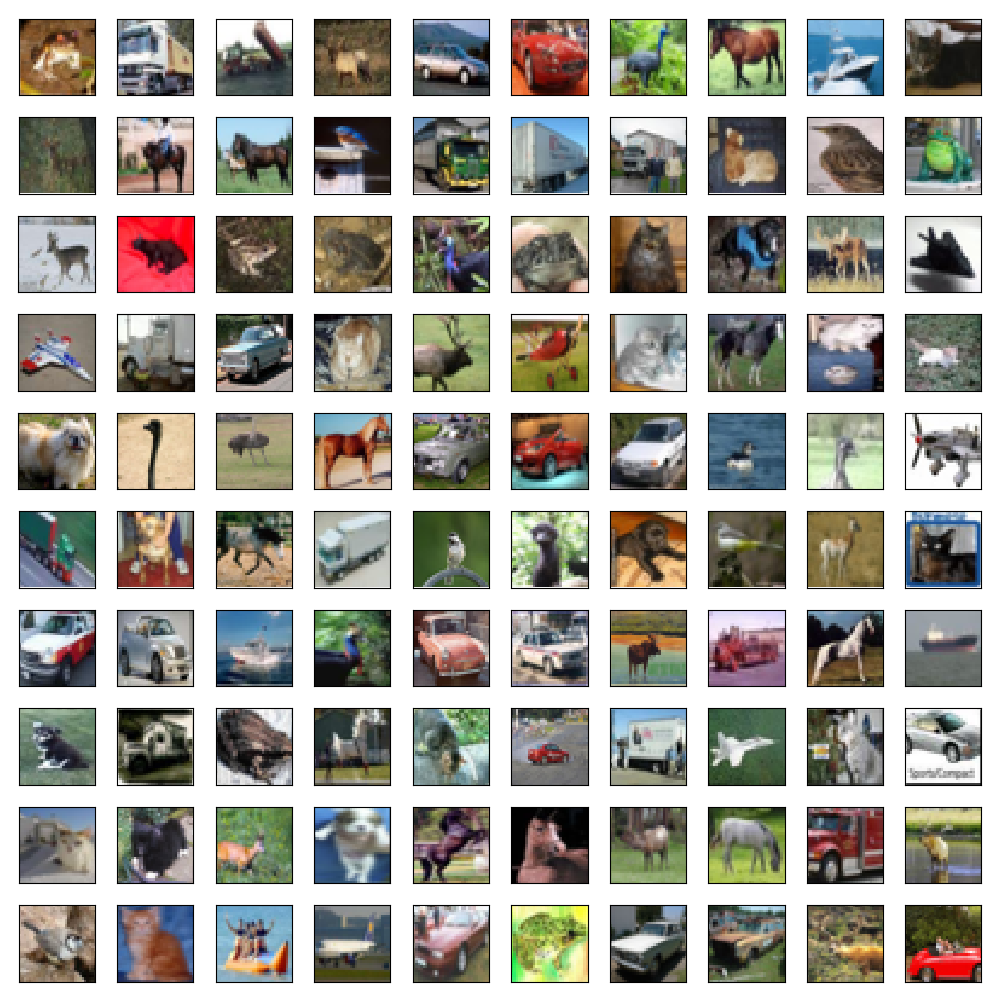

In [12]:
display(plotImages(x_train,n_images=10))

###### Initial Parameter Setup

In [14]:
batch_size = 32
num_classes = 10
epochs = 25

In [15]:
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

##### Step 3 - Define Convolution Network

In [17]:
def initializeModel():
  model = Sequential()

  model.add(Conv2D(32, (3, 3), padding='same',
                   input_shape=x_train.shape[1:]))
  model.add(Activation('relu'))
  model.add(Conv2D(32, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Conv2D(64, (3, 3), padding='same'))
  model.add(Activation('relu'))
  model.add(Conv2D(64, (3, 3)))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  return model


In [18]:
model = initializeModel()

In [19]:
model.summary()

_________________________________________________________________
Layer (type) Output Shape Param # 
=================================================================
conv2d_9 (Conv2D) (None, 32, 32, 32) 896 
_________________________________________________________________
activation_13 (Activation) (None, 32, 32, 32) 0 
_________________________________________________________________
conv2d_10 (Conv2D) (None, 30, 30, 32) 9248 
_________________________________________________________________
activation_14 (Activation) (None, 30, 30, 32) 0 
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32) 0 
_________________________________________________________________
dropout_7 (Dropout) (None, 15, 15, 32) 0 
_________________________________________________________________
conv2d_11 (Conv2D) (None, 15, 15, 64) 18496 
_________________________________________________________________
activation_15 (Activation) (None, 15, 15, 64) 0 
_________________________________________________________________
conv2d_12 (Conv2D) (None, 13, 13, 64) 36928 
_________________________________________________________________
activation_16 (Activation) (None, 13, 13, 64) 0 
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 64) 0 
_________________________________________________________________
dropout_8 (Dropout) (None, 6, 6, 64) 0 
_________________________________________________________________
flatten_3 (Flatten) (None, 2304) 0 
_________________________________________________________________
dense_5 (Dense) (None, 512) 1180160 
_________________________________________________________________
activation_17 (Activation) (None, 512) 0 
_________________________________________________________________
dropout_9 (Dropout) (None, 512) 0 
_________________________________________________________________
dense_6 (Dense) (None, 10) 5130 
_________________________________________________________________
activation_18 (Activation) (None, 10) 0 
=================================================================
Total params: 1,250,858
Trainable params: 1,250,858
Non-trainable params: 0
_________________________________________________________________

##### Step 4 - Define Optimizers and Compile the model

In [21]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

##### Step 5 - Model Training : without Data Augmentation (Takes 5-8 Mins)

In [23]:
from keras.callbacks import History 
history_noaAug = History()
print('Not using data augmentation.')
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(x_test, y_test),
          shuffle=True,
         callbacks=[history_noaAug],
         verbose=1)

Not using data augmentation.
Train on 50000 samples, validate on 10000 samples
Epoch 1/25

 32/50000 [..............................] - ETA: 10:57 - loss: 2.2779 - acc: 0.1250
 192/50000 [..............................] - ETA: 2:04 - loss: 2.3021 - acc: 0.1198 
 352/50000 [..............................] - ETA: 1:16 - loss: 2.3130 - acc: 0.1165
 512/50000 [..............................] - ETA: 57s - loss: 2.3137 - acc: 0.1074 
 672/50000 [..............................] - ETA: 48s - loss: 2.3136 - acc: 0.0997
 832/50000 [..............................] - ETA: 42s - loss: 2.3103 - acc: 0.1070
 992/50000 [..............................] - ETA: 37s - loss: 2.3083 - acc: 0.1119
 1152/50000 [..............................] - ETA: 34s - loss: 2.3060 - acc: 0.1111
 1312/50000 [..............................] - ETA: 32s - loss: 2.3043 - acc: 0.1174
 1472/50000 [..............................] - ETA: 30s - loss: 2.3040 - acc: 0.1155
 1632/50000 [..............................] - ETA: 28s - loss: 2.3025 - acc: 0.1195
 1824/50000 [>.............................] - ETA: 27s - loss: 2.3017 - acc: 0.1179
 2016/50000 [>.............................] - ETA: 25s - loss: 2.3001 - acc: 0.1215
 2208/50000 [>.............................] - ETA: 24s - loss: 2.2986 - acc: 0.1214
 2400/50000 [>.............................] - ETA: 23s - loss: 2.2970 - acc: 0.1229
 2592/50000 [>.............................] - ETA: 22s - loss: 2.2943 - acc: 0.1250
 2784/50000 [>.............................] - ETA: 22s - loss: 2.2915 - acc: 0.1279
 2976/50000 [>.............................] - ETA: 21s - loss: 2.2902 - acc: 0.1290
 3168/50000 [>.............................] - ETA: 20s - loss: 2.2873 - acc: 0.1338
 3360/50000 [=>............................] - ETA: 20s - loss: 2.2842 - acc: 0.1372
 3552/50000 [=>............................] - ETA: 19s - loss: 2.2811 - acc: 0.1374
 3744/50000 [=>............................] - ETA: 19s - loss: 2.2760 - acc: 0.1413
 3936/50000 [=>............................] - ETA: 19s - loss: 2.2718 - acc: 0.1438
 4128/50000 [=>............................] - ETA: 18s - loss: 2.2680 - acc: 0.1444
 4320/50000 [=>............................] - ETA: 18s - loss: 2.2632 - acc: 0.1468
 4512/50000 [=>............................] - ETA: 18s - loss: 2.2588 - acc: 0.1503
 4704/50000 [=>............................] - ETA: 17s - loss: 2.2549 - acc: 0.1518
 4896/50000 [=>............................] - ETA: 17s - loss: 2.2489 - acc: 0.1548
 5088/50000 [==>...........................] - ETA: 17s - loss: 2.2452 - acc: 0.1561
 5280/50000 [==>...........................] - ETA: 17s - loss: 2.2418 - acc: 0.1561
 5472/50000 [==>...........................] - ETA: 16s - loss: 2.2363 - acc: 0.1586
 5632/50000 [==>...........................] - ETA: 16s - loss: 2.2329 - acc: 0.1593
 5824/50000 [==>...........................] - ETA: 16s - loss: 2.2260 - acc: 0.1614
 6016/50000 [==>...........................] - ETA: 16s - loss: 2.2212 - acc: 0.1622
 6208/50000 [==>...........................] - ETA: 16s - loss: 2.2188 - acc: 0.1632
 6400/50000 [==>...........................] - ETA: 15s - loss: 2.2149 - acc: 0.1648
 6592/50000 [==>...........................] - ETA: 15s - loss: 2.2091 - acc: 0.1667
 6784/50000 [===>..........................] - ETA: 15s - loss: 2.2030 - acc: 0.1698
 6976/50000 [===>..........................] - ETA: 15s - loss: 2.2016 - acc: 0.1710
 7168/50000 [===>..........................] - ETA: 15s - loss: 2.1978 - acc: 0.1720
 7360/50000 [===>..........................] - ETA: 15s - loss: 2.1926 - acc: 0.1739
 7552/50000 [===>..........................] - ETA: 14s - loss: 2.1906 - acc: 0.1747
 7744/50000 [===>..........................] - ETA: 14s - loss: 2.1892 - acc: 0.1751
 7936/50000 [===>..........................] - ETA: 14s - loss: 2.1864 - acc: 0.1754
 8128/50000 [===>..........................] - ETA: 14s - loss: 2.1842 - acc: 0.1764
 8320/50000 [===>..........................] - ETA: 14s - loss: 2.1795 - acc: 0.1791
 

###### Evaluate the model (to Get final test accuracy and loss)

In [25]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])
print('Test loss:', score[0])

##### Visualize Model metrics

In [27]:
pltoutput = plotmetrics(history_noaAug)
display(pltoutput)

##### Step 6 - Model Training with Data Augmentation (Takes 5-10 Minutes)

In [29]:
model = initializeModel()
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [30]:
from keras.callbacks import History 
history_Aug = History()
print('Using real-time data augmentation.')
# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

# Fit the model on the batches generated by datagen.flow().
model.fit_generator(datagen.flow(x_train, y_train,
                                 batch_size=batch_size),
                    steps_per_epoch=x_train.shape[0] // batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                     callbacks=[history_Aug],
                   verbose =1)

--------------------------------------------------------------------------- 
 NameError Traceback (most recent call last)
 /databricks/python/lib/python3.6/site-packages/tqdm/_tqdm_notebook.py in status_printer (_, total, desc, ncols) 
 102 if total : 
 --> 103 pbar = IntProgress ( min = 0 , max = total ) 
 104 else : # No total? Show info style bar with no progress tqdm status 

 NameError : name 'IntProgress' is not defined

During handling of the above exception, another exception occurred:

 ImportError Traceback (most recent call last)
 <command-3803303089746484> in <module> () 
 26 validation_data = ( x_test , y_test ) , 
 27 callbacks = [ history_Aug , TQDMNotebookCallback ( ) ] , 
 ---> 28 verbose =1)
 
 /databricks/python/lib/python3.6/site-packages/keras/legacy/interfaces.py in wrapper (*args, **kwargs) 
 89 warnings.warn('Update your `' + object_name + '` call to the ' +
 90 'Keras 2 API: ' + signature, stacklevel=2)
 ---> 91 return func ( * args , ** kwargs ) 
 92 wrapper . _original_function = func
 93 return wrapper

 /databricks/python/lib/python3.6/site-packages/keras/engine/training.py in fit_generator (self, generator, steps_per_epoch, epochs, verbose, callbacks, validation_data, validation_steps, class_weight, max_queue_size, workers, use_multiprocessing, shuffle, initial_epoch) 
 1416 use_multiprocessing = use_multiprocessing , 
 1417 shuffle = shuffle , 
 -> 1418 initial_epoch=initial_epoch)
 1419 
 1420 @ interfaces . legacy_generator_methods_support

 /databricks/python/lib/python3.6/site-packages/keras/engine/training_generator.py in fit_generator (model, generator, steps_per_epoch, epochs, verbose, callbacks, validation_data, validation_steps, class_weight, max_queue_size, workers, use_multiprocessing, shuffle, initial_epoch) 
 100 'metrics' : callback_metrics , 
 101 })
 --> 102 callbacks . on_train_begin ( ) 
 103 
 104 enqueuer = None 

 /databricks/python/lib/python3.6/site-packages/keras/callbacks.py in on_train_begin (self, logs) 
 130 logs = logs or { } 
 131 for callback in self . callbacks : 
 --> 132 callback . on_train_begin ( logs ) 
 133 
 134 def on_train_end ( self , logs = None ) : 

 /databricks/python/lib/python3.6/site-packages/keras_tqdm/tqdm_callback.py in on_train_begin (self, logs) 
 127 else self.params['nb_epoch'])
 128 self.tqdm_outer = self.build_tqdm_outer(desc=self.outer_description,
 --> 129 total=epochs)
 130 
 131 def on_train_end ( self , logs = { } ) : 

 /databricks/python/lib/python3.6/site-packages/keras_tqdm/tqdm_callback.py in build_tqdm_outer (self, desc, total) 
 65 : return : new progress bar
 66 """
 ---> 67 return self . tqdm ( desc = desc , total = total , leave = self . leave_outer ) 
 68 
 69 def build_tqdm_inner ( self , desc , total ) : 

 /databricks/python/lib/python3.6/site-packages/keras_tqdm/tqdm_notebook_callback.py in tqdm (self, desc, total, leave) 
 31 : return : new progress bar
 32 """
 ---> 33 return tqdm_notebook ( desc = desc , total = total , leave = leave ) 

 /databricks/python/lib/python3.6/site-packages/tqdm/__init__.py in tqdm_notebook (*args, **kwargs) 
 23 """See tqdm._tqdm_notebook.tqdm_notebook for full documentation""" 
 24 from . _tqdm_notebook import tqdm_notebook as _tqdm_notebook
 ---> 25 return _tqdm_notebook ( * args , ** kwargs ) 
 26 
 27 

 /databricks/python/lib/python3.6/site-packages/tqdm/_tqdm_notebook.py in __init__ (self, *args, **kwargs) 
 210 # Replace with IPython progress bar display (with correct total) 
 211 self.sp = self.status_printer(
 --> 212 self.fp, self.total, self.desc, self.ncols)
 213 self . desc = None # trick to place description before the bar 
 214 

 /databricks/python/lib/python3.6/site-packages/tqdm/_tqdm_notebook.py in status_printer (_, total, desc, ncols) 
 109 # #187 #451 #558 
 110 raise ImportError(
 --> 111 "IntProgress not found. Please update jupyter and ipywidgets." 
 112 " See https://ipywidgets.readthedocs.io/en/stable" 
 113 "/user_install.html")

 ImportError : IntProgress not 

###### Evaluate the model (to Get final test accuracy and loss)

In [32]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', score[1])
print('Test loss:', score[0])

##### Visualize Model metrics

In [34]:
pltoutput = plotmetrics(history_Aug)
display(pltoutput)